Enter your Polygon.io API key:  ········


Fetching data for CRWD...
Fetching data for PANW...
Fetching data for FTNT...
Fetching data for ZS...
Fetching data for OKTA...
Fetching data for CYBR...
Fetching data for S...
Fetching data for IBM...
Fetching data for CHKP...
Fetching data for NET...
Fetching data for GEN...
Fetching data for TENB...
Fetching data for RPD...
Fetching data for BB...
Fetching data for VRNS...
Fetching data for RDWR...
Fetching data for QLYS...
Fetching data for JAMF...
Fetching data for OSPN...
Fetching data for ATEN...
Fetching data for FSLY...
Fetching data for AVGO...
Fetching data for BAH...
Fetching data for PSN...
Fetching data for NTCT...


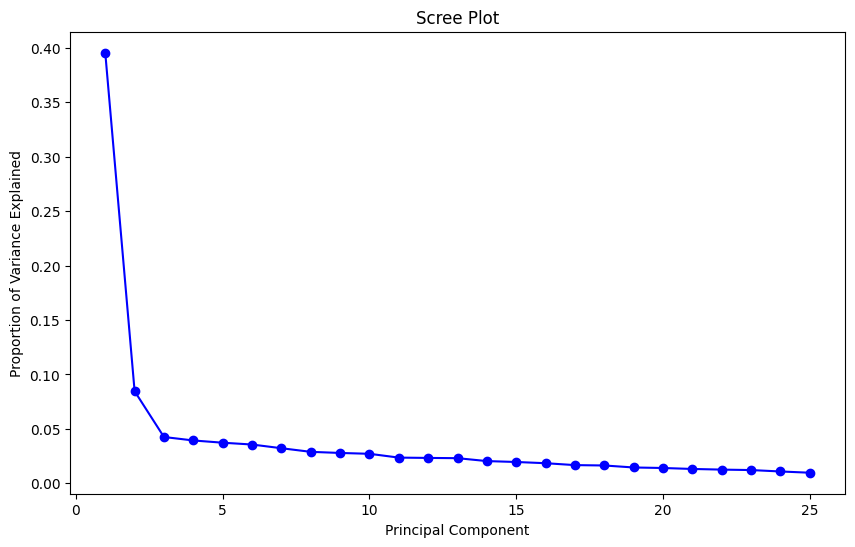

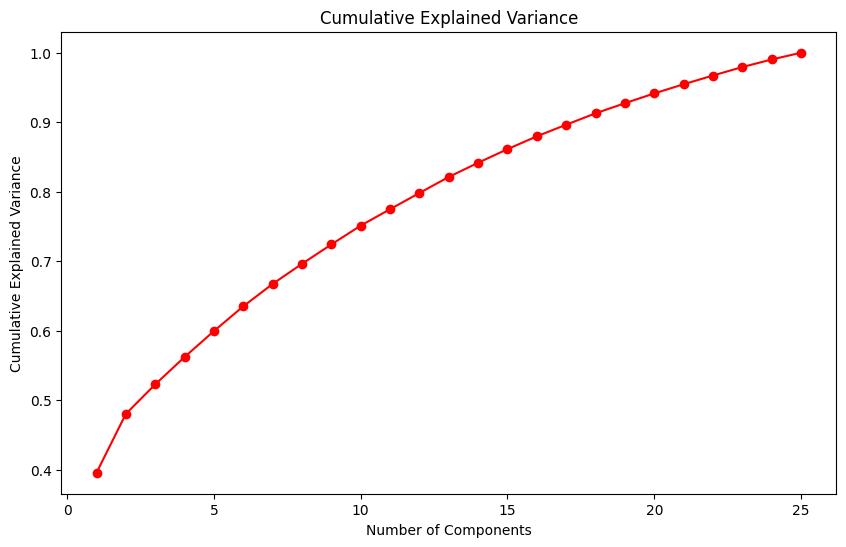

3D PCA plot saved as 'pca_3d_plot.html'. Please open this file in a web browser.


<Figure size 640x480 with 0 Axes>

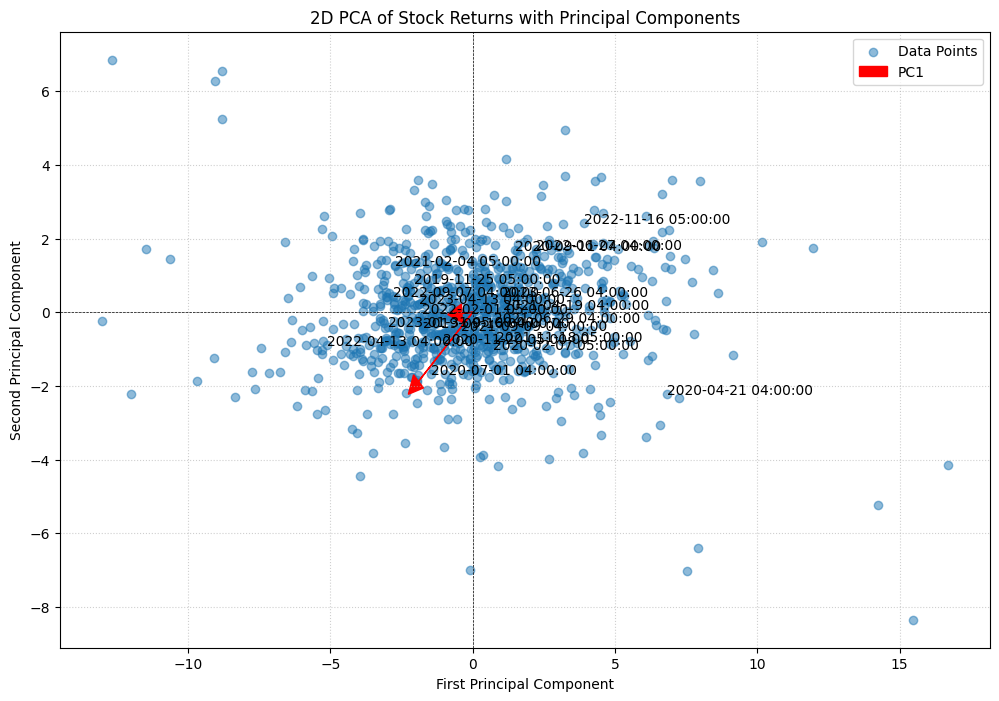

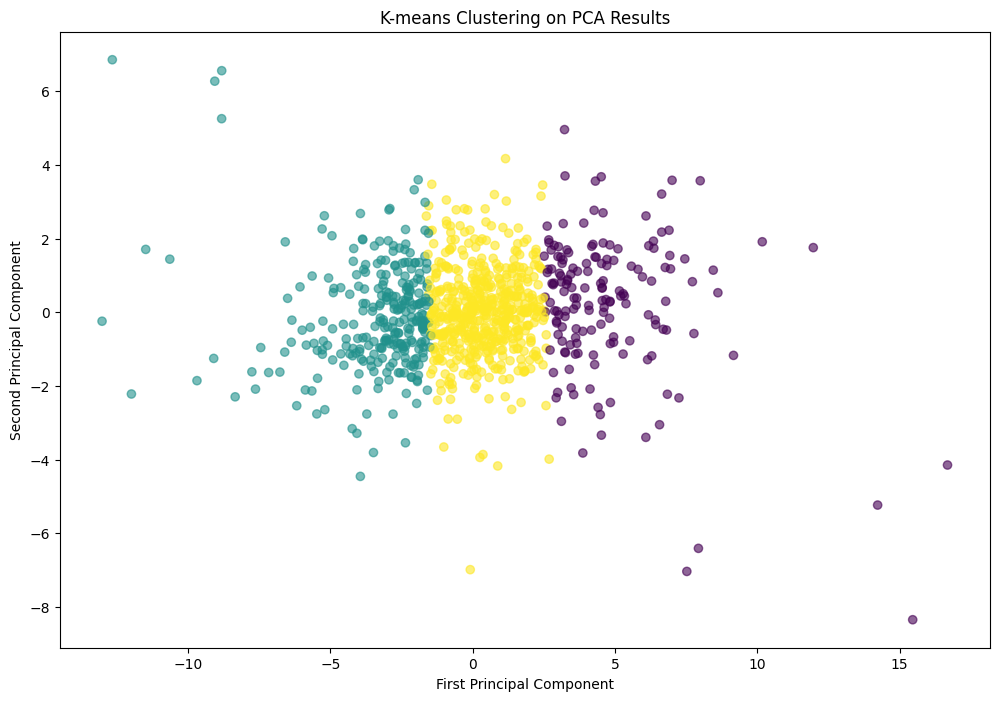

Mean Squared Error: 7.9455489651085e-33
R-squared: 1.0


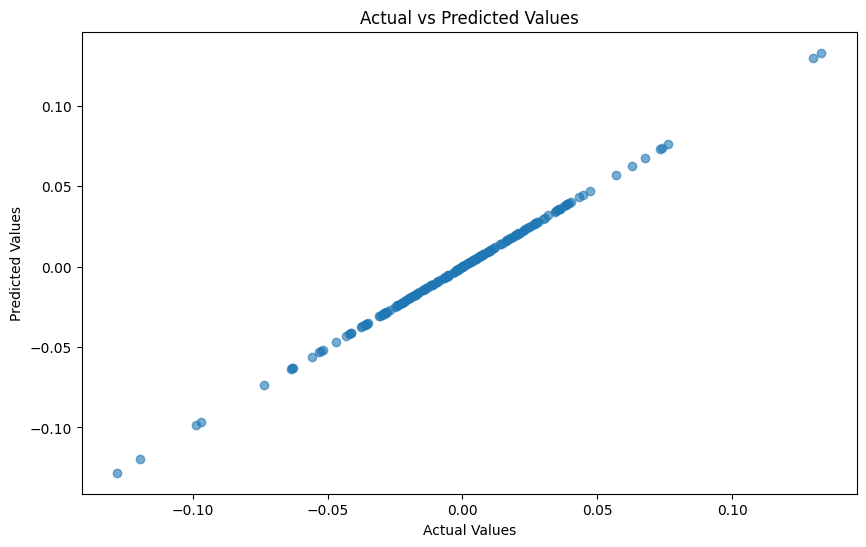

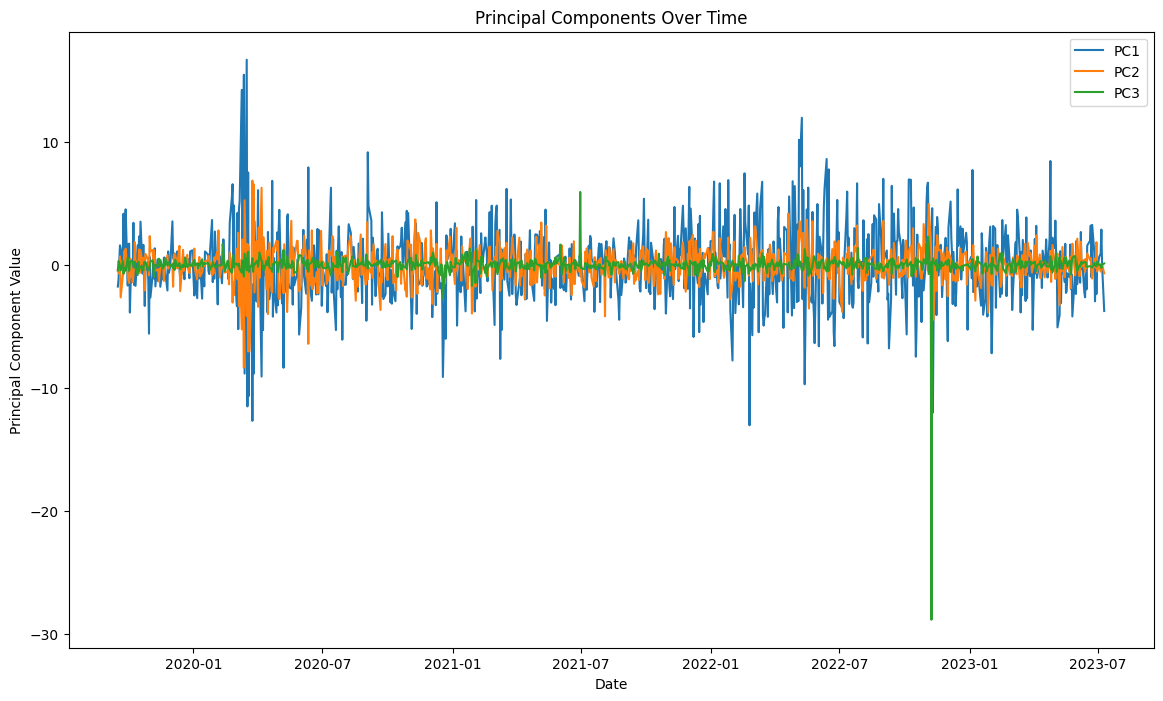

PC1                 PC2                 PC3                 PC4  \
          mean       std      mean       std      mean       std      mean   
Year                                                                         
2019  0.025766  1.718798  0.009586  0.958189 -0.042169  0.317963  0.076615   
2020 -0.234123  3.592351 -0.123149  1.949650  0.053209  0.430393  0.038114   
2021 -0.020920  2.299399  0.017320  1.217172  0.029287  0.549795 -0.122184   
2022  0.319387  3.939172  0.136143  1.398393 -0.089711  1.867807  0.043938   
2023 -0.136384  2.460046 -0.062782  1.027504  0.037504  0.349282  0.033899   

                     PC5            ...      PC21                PC22  \
           std      mean       std  ...      mean       std      mean   
Year                                ...                                 
2019  0.368702  0.027085  0.623221  ... -0.030794  0.603596  0.008350   
2020  0.620867 -0.012938  0.947044  ...  0.015694  0.569607 -0.043013   
2021  1.679251 -0.042792  1.289772  ...  0.005407  0.517003 -0.009396   
2022  0.629996  0.054088  0.798253  ... -0.033616  0.614677  0.045132   
2023  0.445426 -0.012020  0.698415  ...  0.041971  0.596931  0.010044   

                    PC23                PC24                PC25            
           std      mean       std      mean       std      mean       std  
Year                                                                        
2019  0.537456  0.100629  0.576330  0.042929  0.539504  0.001198  0.556328  
2020  0.584302 -0.051963  0.604841 -0.001846  0.533667  0.001311  0.515083  
2021  0.410695  0.048665  0.525462  0.014325  0.469157  0.002790  0.447610  
2022  0.633033 -0.021392  0.545650  0.002462  0.534130 -0.032356  0.482931  
2023  0.632985 -0.010037  0.480269 -0.054113  0.563771  0.054239  0.519350  

[5 rows x 50 columns]

In [1]:
import getpass
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display  # For displaying DataFrames in Jupyter

# Import custom modules
import fetch_data
import pca_analysis

# Get API key
api_key = getpass.getpass("Enter your Polygon.io API key: ")

# Define tickers and date range
tickers = ['CRWD', 'PANW', 'FTNT', 'ZS', 'OKTA', 'CYBR', 'S', 'IBM', 'CHKP', 'NET', 'GEN', 'TENB', 
           'RPD', 'BB', 'VRNS', 'RDWR', 'QLYS', 'JAMF', 'OSPN', 'ATEN', 'FSLY', 'AVGO', 'BAH', 
           'PSN', 'NTCT']
start_date = "2019-07-10"
end_date = "2023-07-10"

# Fetch data
data = fetch_data.fetch_data_for_multiple_stocks(tickers, start_date, end_date, api_key)

# Perform PCA
returns = pca_analysis.prepare_data(data)
pca_results, explained_variance_ratio, eigenvectors = pca_analysis.perform_pca(returns)

# Plot explained variance and save
pca_analysis.plot_explained_variance(explained_variance_ratio)
plt.savefig('explained_variance.png')

# Plot PCA results in 3D and save
pca_analysis.plot_pca_results_3d(pca_results, returns, eigenvectors, explained_variance_ratio)
plt.savefig('pca_results_3d.png')

# Plot PCA results in 2D and save
pca_analysis.plot_pca_results_2d(pca_results, returns, eigenvectors, explained_variance_ratio, filename='pca_results_2d.png')

# Clustering Analysis
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(pca_results)
plt.figure(figsize=(12, 8))
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('K-means Clustering on PCA Results')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig('kmeans_clustering.png')
plt.show()

# Regression Analysis
target = returns.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(pca_results, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('regression_results.png')
plt.show()

# Temporal Pattern Analysis
plt.figure(figsize=(14, 8))
plt.plot(returns.index, pca_results[:, 0], label='PC1')
plt.plot(returns.index, pca_results[:, 1], label='PC2')
plt.plot(returns.index, pca_results[:, 2], label='PC3')
plt.title('Principal Components Over Time')
plt.xlabel('Date')
plt.ylabel('Principal Component Value')
plt.legend()
plt.savefig('pca_temporal_patterns.png')
plt.show()

# Adjusting for the number of principal components
num_components = pca_results.shape[1]
columns = [f'PC{i+1}' for i in range(num_components)]

# Creating a DataFrame for PCA results
pca_df = pd.DataFrame(pca_results, index=returns.index, columns=columns)
pca_df['Year'] = pca_df.index.year
pca_summary = pca_df.groupby('Year').agg(['mean', 'std'])

# Display the pca_summary DataFrame
display(pca_summary)
